# Graphical visualisation

This notebook looks at various visualisation. Some are quite successful and some are not.

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import the data

Import the data and show the columns names.

In [2]:
file_name = "data_output/air_gdp_density.csv"
air_GDP_pd = pd.read_csv(file_name)
air_GDP_pd.columns



Index(['Unnamed: 0', 'country_name', 'country_code', 'gdp', 'year', 'pm2_5',
       'Land_Area_KM', 'Population_density2020', 'Population2020'],
      dtype='object')

Show the first five rows of the dataframe

In [3]:
air_GDP_pd.head()

,Unnamed: 0,country_name,country_code,gdp,year,pm2_5,Land_Area_KM,Population_density2020,Population2020
0,0,Australia,AUS,1.150000e+12,2010,10.618879,7682300,3.319303,25499884
1,1,Australia,AUS,1.400000e+12,2011,11.047265,7682300,3.319303,25499884
2,2,Australia,AUS,1.550000e+12,2012,10.537090,7682300,3.319303,25499884
3,3,Australia,AUS,1.580000e+12,2013,9.987684,7682300,3.319303,25499884
4,4,Australia,AUS,1.470000e+12,2014,9.492979,7682300,3.319303,25499884


Statistical description of the numerical columns

In [4]:
air_GDP_pd.describe()

,Unnamed: 0,gdp,year,pm2_5,Land_Area_KM,Population_density2020,Population2020
count,553.000000,5.530000e+02,553.000000,553.000000,5.530000e+02,553.000000,5.530000e+02
mean,276.000000,7.065152e+11,2013.000000,28.152306,8.559677e+05,248.225085,6.990064e+07
std,159.781622,2.248522e+12,2.001811,19.271789,1.928573e+06,937.034777,2.229393e+08
min,0.000000,9.699365e+08,2010.000000,5.893757,4.600000e+02,3.319303,9.834700e+04
25%,138.000000,1.375116e+10,2011.000000,14.188074,7.218000e+04,24.843098,5.540720e+06
50%,276.000000,5.723601e+10,2013.000000,23.231479,2.483600e+05,86.967886,1.674393e+07
75%,414.000000,3.690000e+11,2015.000000,33.287200,6.229800e+05,213.797826,4.385104e+07
max,552.000000,1.870000e+13,2016.000000,100.784428,9.388211e+06,8357.631429,1.439324e+09


## Reducing complexity in the data - Cleaning 
Large range of data exists in the data for many statistical variables. It could affect negatively the visulation. So we need to normalise or reduce the complexity.

some of the data to reduce the range. Make a deep copy of the data and then normalise some of the columns.

In [188]:
# Deep copy
air_gdp_log = air_GDP_pd.copy(deep=True)

# change normalise gdp  
air_gdp_log['gdp'] = np.log(air_gdp_log['gdp'])
air_gdp_log['Population2020'] = np.log(air_gdp_log['Population2020'])
air_gdp_log['Population_density2020'] = np.log(air_gdp_log['Population_density2020'])
air_gdp_log['pm2_5'] = np.log(air_gdp_log['pm2_5'])
air_gdp_log.describe()

,Unnamed: 0,gdp,year,pm2_5,Land_Area_KM,Population_density2020,Population2020
count,553.000000,553.000000,553.000000,553.000000,5.530000e+02,553.000000,553.000000
mean,276.000000,25.012504,2013.000000,3.133543,8.559677e+05,4.294900,16.509257
std,159.781622,2.211485,2.001811,0.638355,1.928573e+06,1.464231,1.744099
min,0.000000,20.692741,2010.000000,1.773894,4.600000e+02,1.199755,11.496257
25%,138.000000,23.344389,2011.000000,2.652402,7.218000e+04,3.212580,15.527635
50%,276.000000,24.770449,2013.000000,3.145508,2.483600e+05,4.465539,16.633546
75%,414.000000,26.634062,2015.000000,3.505173,6.229800e+05,5.365031,17.596309
max,552.000000,30.559545,2016.000000,4.612984,9.388211e+06,9.030930,21.087439


In [189]:
air_gdp_log.head()

,Unnamed: 0,country_name,country_code,gdp,year,pm2_5,Land_Area_KM,Population_density2020,Population2020
0,0,Australia,AUS,27.770783,2010,2.362633,7682300,1.199755,17.054184
1,1,Australia,AUS,27.967493,2011,2.402183,7682300,1.199755,17.054184
2,2,Australia,AUS,28.069276,2012,2.354901,7682300,1.199755,17.054184
3,3,Australia,AUS,28.088446,2013,2.301353,7682300,1.199755,17.054184
4,4,Australia,AUS,28.016284,2014,2.250552,7682300,1.199755,17.054184


Transform the country code from character factors into numerical factors.

In [190]:
air_gdp_log["country_code"], country_key = pd.factorize(air_gdp_log["country_code"])
air_gdp_log.head()

,Unnamed: 0,country_name,country_code,gdp,year,pm2_5,Land_Area_KM,Population_density2020,Population2020
0,0,Australia,0,27.770783,2010,2.362633,7682300,1.199755,17.054184
1,1,Australia,0,27.967493,2011,2.402183,7682300,1.199755,17.054184
2,2,Australia,0,28.069276,2012,2.354901,7682300,1.199755,17.054184
3,3,Australia,0,28.088446,2013,2.301353,7682300,1.199755,17.054184
4,4,Australia,0,28.016284,2014,2.250552,7682300,1.199755,17.054184


## Let's start with some simple visualisation

## Some bad examples histograms of the GDP


The number bins show no granularity of the data. 

(array([511.,  21.,   7.,   0.,   0.,   0.,   0.,   0.,   0.,  14.]),
 array([9.83470000e+04, 1.44020890e+08, 2.87943433e+08, 4.31865976e+08,
        5.75788519e+08, 7.19711062e+08, 8.63633604e+08, 1.00755615e+09,
        1.15147869e+09, 1.29540123e+09, 1.43932378e+09]),
 <BarContainer object of 10 artists>)

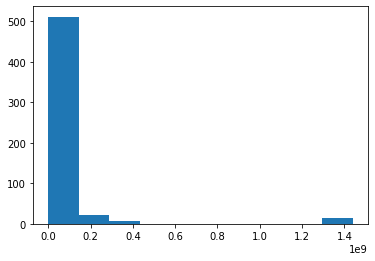

In [191]:
plt.hist(air_GDP_pd['Population2020'])

The range of the values is too large to show any granularity

(array([112.,  70.,  77.,  63.,  14.,  28.,  28.,  14.,   0.,  28.,   7.,
          7.,  14.,   7.,  14.,   0.,   0.,   7.,   0.,   0.,   0.,   0.,
          7.,   0.,   0.,   0.,  14.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   7.,   0.,
          0.,   0.,   7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

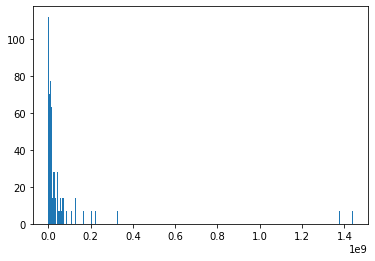

In [192]:
plt.hist(air_GDP_pd['Population2020'], bins=300)

## Some good examples of histogram

The number of bins shows an appropriate level of granularity and shape of the distribution. 

(array([11., 16., 15., 14., 16., 12., 14., 22., 21., 12., 15.,  8., 24.,
        14., 16., 10., 12., 17., 16., 12., 15., 16., 15., 15., 19., 13.,
        12.,  9.,  5.,  5.,  2.,  5.,  2.,  2.,  8.,  3.,  5.,  6.,  6.,
         2.,  6.,  1.,  1.,  3.,  3.,  3.,  3.,  5.,  3.,  2.,  2.,  1.,
         1.,  3.,  1.,  5.,  4.,  3.,  1.,  2.,  1.,  1.,  3.,  0.,  1.,
         2.,  3.,  2.,  3.,  1.,  3.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,  2.,  0.,  1.,
         0.,  0.,  0.,  2.,  2.,  1.,  2.,  0.,  2.]),
 array([  5.89375748,   6.84266419,   7.79157089,   8.7404776 ,
          9.6893843 ,  10.638291  ,  11.58719771,  12.53610441,
         13.48501112,  14.43391782,  15.38282452,  16.33173123,
         17.28063793,  18.22954464,  19.17845134,  20.12735805,
         21.07626475,  22.02517145,  22.97407816,  23.92298486,
         24.87189157,  25.82079827,  26.76970497,  27.71861168,
         28.66751838,  29.61642509,  30.56533179, 

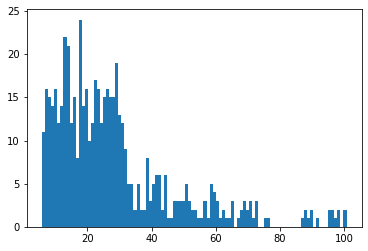

In [193]:
plt.hist(air_GDP_pd['pm2_5'], bins=100)

Text(0.5, 0, 'Population density 2020 (log scale)')

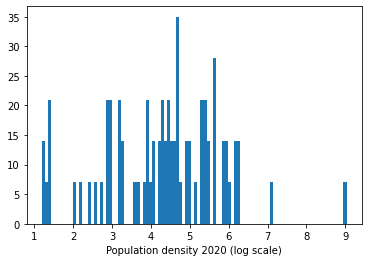

In [194]:
#data_pd = air_GDP_pd[air_GDP_pd['Population_density2020'] < 2000]
plt.hist(air_gdp_log['Population_density2020'], bins=100)
plt.xlabel('Population density 2020 (log scale)')

## Two dimensions
These graphs show two dimension of the data

### How is the air pollution fluctuating over the years ?

In [195]:
columns_name = ['country_name', 'country_code', 'gdp', 'year', 'pm2_5']
data_pd = air_GDP_pd[columns_name].copy(deep=True)
data_pd.head()

,country_name,country_code,gdp,year,pm2_5
0,Australia,AUS,1.150000e+12,2010,10.618879
1,Australia,AUS,1.400000e+12,2011,11.047265
2,Australia,AUS,1.550000e+12,2012,10.537090
3,Australia,AUS,1.580000e+12,2013,9.987684
4,Australia,AUS,1.470000e+12,2014,9.492979


In [196]:
columns_name = ['country_name', 'country_code', 'gdp', 'year', 'pm2_5']
aus_data = data_pd[data_pd['country_code'] == "AUS"]
gbr_data = data_pd[data_pd['country_code'] == "GBR"]
usa_data = data_pd[data_pd['country_code'] == "USA"]


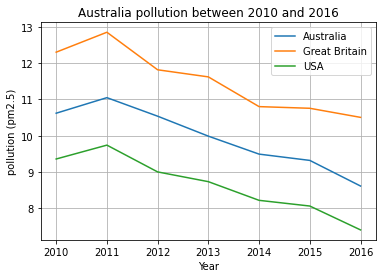

In [197]:
plt.plot(aus_data['year'], aus_data['pm2_5'])
plt.plot(gbr_data['year'], gbr_data['pm2_5'])
plt.plot(usa_data['year'], usa_data['pm2_5'])
plt.title('Australia pollution between 2010 and 2016')
plt.xlabel('Year')
plt.ylabel('pollution (pm2.5)')
plt.grid(True)
plt.legend(['Australia', "Great Britain", "USA"])
plt.show()

## Is there a relationship between population density and population?

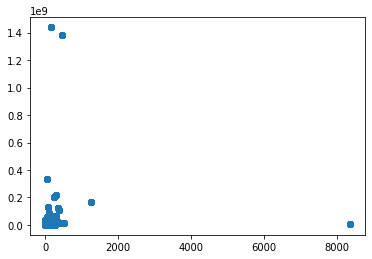

In [198]:
plt.scatter(air_GDP_pd['Population_density2020'], air_GDP_pd['Population2020'])

Text(0.5, 0, 'Population in 2020 (log scale)')

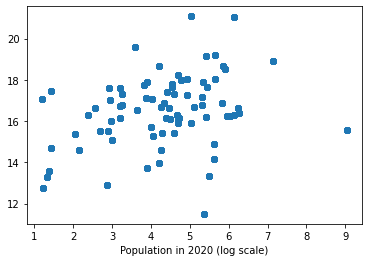

In [199]:
plt.scatter(air_gdp_log['Population_density2020'], air_gdp_log['Population2020'])
plt.xlabel('Population density in 2020 (log scale)')
plt.xlabel('Population in 2020 (log scale)')



## Three dimensional visualisation

Splice the data (log scale).

In [200]:

columns_name = ['country_code', 'gdp', 'year', 'pm2_5', 'Population2020']
data_pd = air_gdp_log[columns_name].copy(deep=True)
data_pd.describe()

,country_code,gdp,year,pm2_5,Population2020
count,553.000000,553.000000,553.000000,553.000000,553.000000
mean,39.000000,25.012504,2013.000000,3.133543,16.509257
std,22.824155,2.211485,2.001811,0.638355,1.744099
min,0.000000,20.692741,2010.000000,1.773894,11.496257
25%,19.000000,23.344389,2011.000000,2.652402,15.527635
50%,39.000000,24.770449,2013.000000,3.145508,16.633546
75%,59.000000,26.634062,2015.000000,3.505173,17.596309
max,78.000000,30.559545,2016.000000,4.612984,21.087439


compute the coeficient of variation for each country for the GDP

In [201]:
gdp_cv = data_pd.groupby(['country_code'])['gdp'].std()/data_pd.groupby(['country_code'])['gdp'].mean()
gdp_cv

country_code
0     0.004308
1     0.002081
2     0.006578
3     0.002069
4     0.004662
        ...   
74    0.005258
75    0.002688
76    0.004611
77    0.005500
78    0.008609
Name: gdp, Length: 79, dtype: float64

Compute the median of the pm2_5.

In [202]:
pm2_5_median = data_pd.groupby(['country_code'])['pm2_5'].median()
pm2_5_median

country_code
0     2.301353
1     2.644870
2     3.654630
3     2.640675
4     3.477941
        ...   
74    2.347138
75    2.167312
76    3.280049
77    3.361638
78    3.138716
Name: pm2_5, Length: 79, dtype: float64

Compute the min of the population. It is constant for each country.

In [203]:
pop_min = data_pd.groupby(['country_code'])['Population2020'].min()
pop_min

country_code
0     17.054184
1     16.013446
2     16.291274
3     16.265621
4     16.310632
        ...    
74    15.060740
75    19.617637
76    17.898266
77    16.726989
78    16.514380
Name: Population2020, Length: 79, dtype: float64

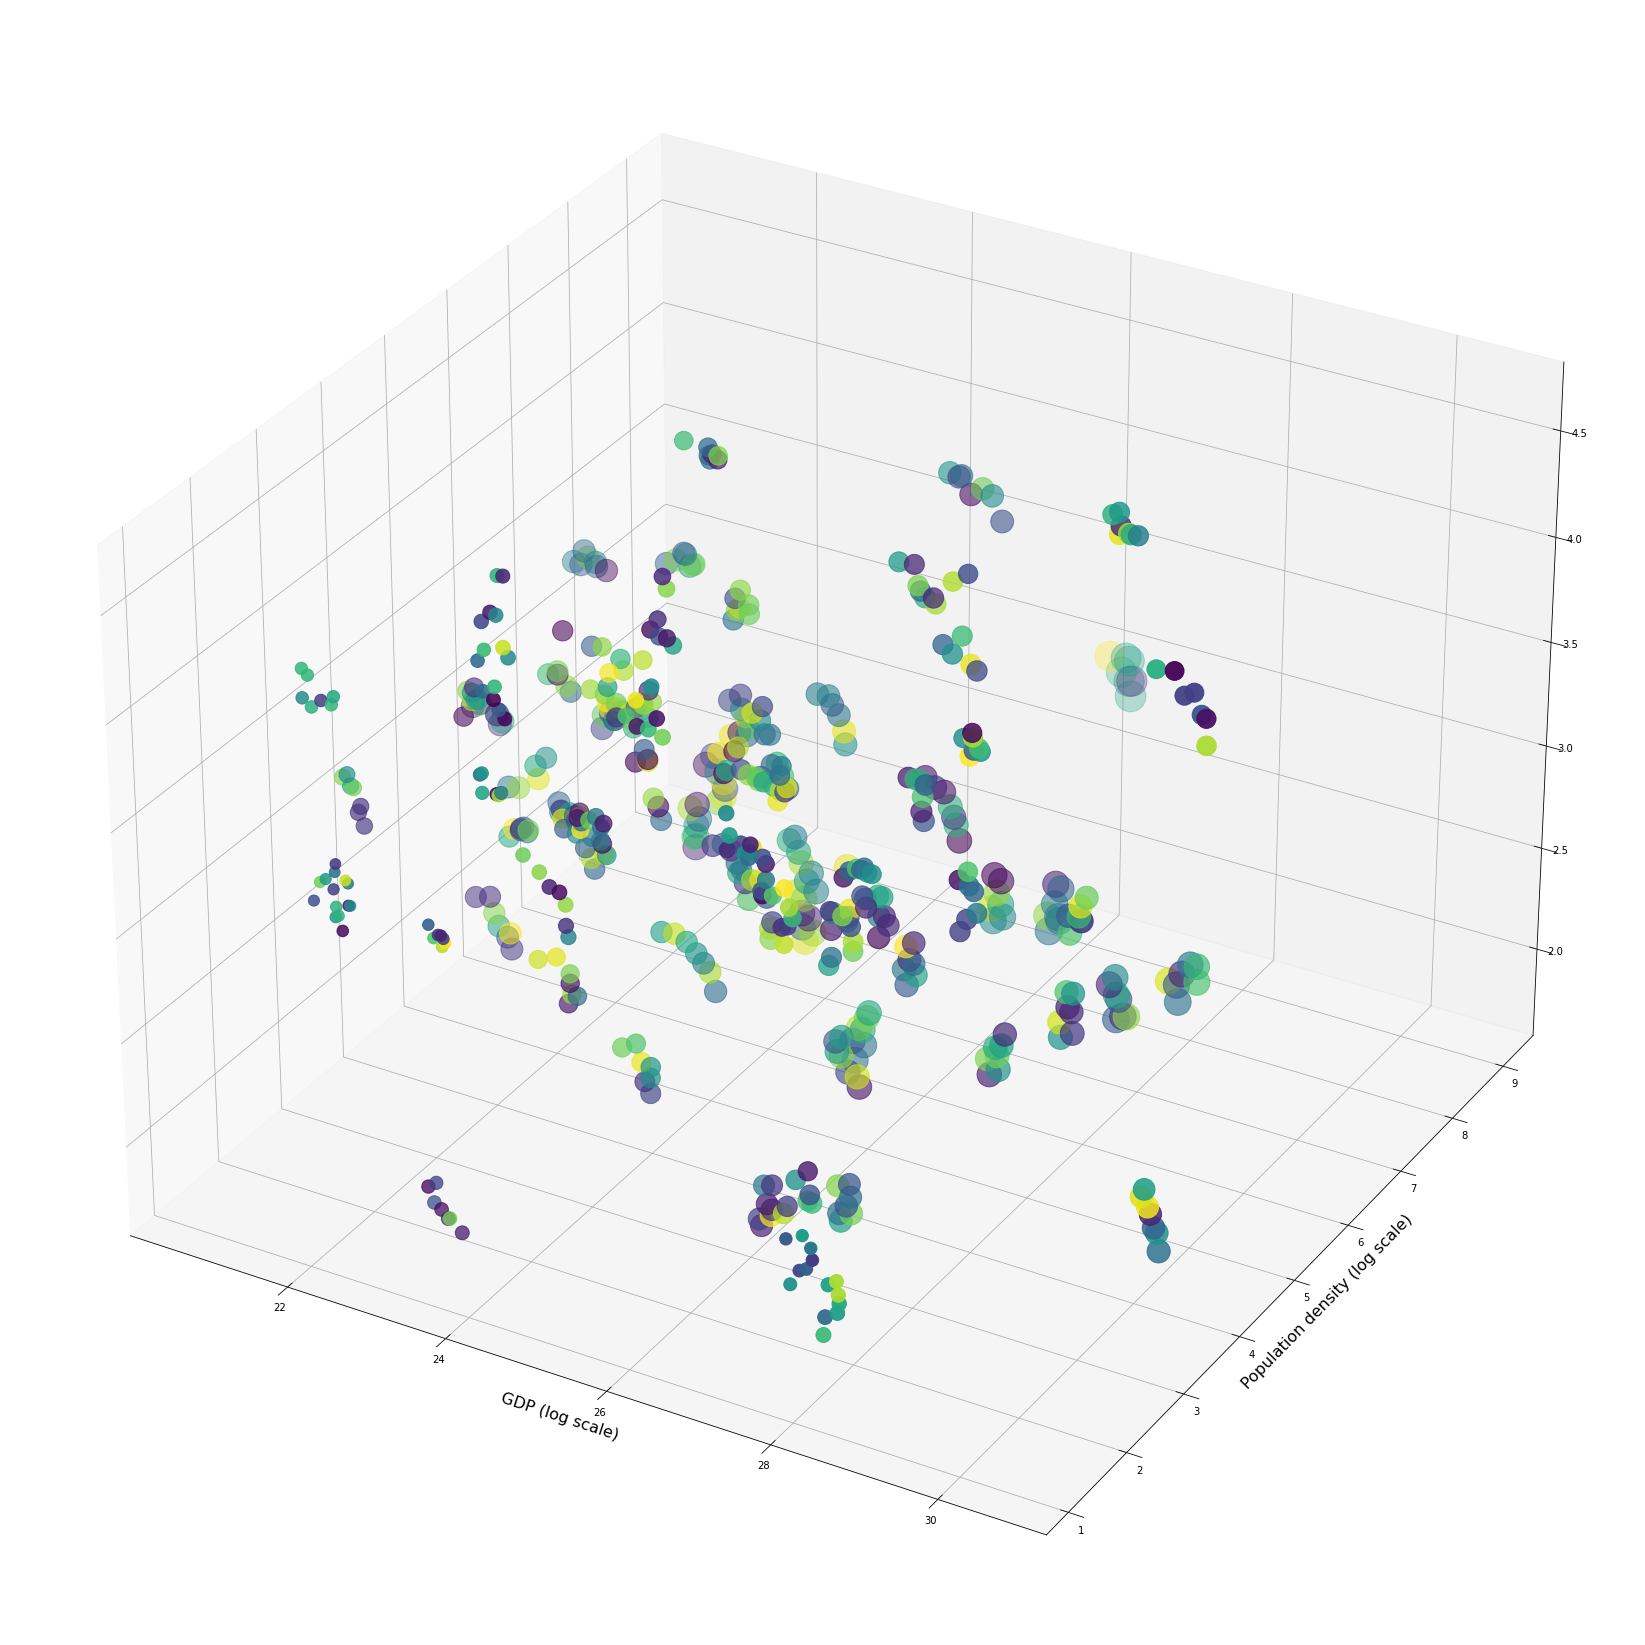

In [213]:

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(30)
s =  (air_gdp_log['Population_density2020']/(air_gdp_log['pm2_5'] *0.1))*30
colors = np.random.rand(len(s))
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
ax.scatter(air_gdp_log['gdp'], 
           air_gdp_log['Population_density2020'], 
           air_gdp_log['pm2_5'],
           s = s,
           c = colors)
plt.xlabel("GDP (log scale)", size=16)
plt.ylabel("Population density (log scale)", size=16)
plt.show()
 
#plt.xlabel('GDP (log scale)')
#plt.xlabel('Population in 2020 (log scale)')

